In [3]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [5]:
patient_affinitiesI = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassI.csv', index_col=0).dropna()
patient_affinitiesII = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_affinities.cancer.TCGA.conservative.mut.ClassII.csv', index_col=0).dropna()
patient_mutations = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/presentation/clean_matrices/patient_mutations.cancer.TCGA.conservative.mut.csv', index_col=0).dropna()
all_mutations = list(patient_affinitiesI.columns)

In [6]:
of_interest = ['GNAQ', 'GNA11', 'GNAS', 'GNA13']

In [8]:
[x for x in all_mutations if x.split('_')[0] in of_interest]

['GNAS_R201C',
 'GNAS_R201H',
 'GNAS_R160C',
 'GNAS_A109T',
 'GNAS_R389C',
 'GNAS_R356C']

In [11]:
mutations_to_plot = [x for x in all_mutations if 'GN' in x.split('_')[0]]

In [17]:
def plot_patient_fractions(MHCI_cutoff, MHCII_cutoff, patient_affinitiesI, patient_affinitiesII, high_frequency_mutations):
    fractionsI, fractionsII = [], []
    mutation_count = []
    for mutation in high_frequency_mutations:
        fractionsI.append(len(patient_affinitiesI[mutation][patient_affinitiesI[mutation] < MHCI_cutoff]) / float(len(patient_affinitiesI)))
        fractionsII.append(len(patient_affinitiesII[mutation][patient_affinitiesII[mutation] < MHCII_cutoff]) / float(len(patient_affinitiesII)))
        #mutation_count.append(patient_mutations.sum().ix[mutation])
    df = pd.DataFrame({'Mutation': high_frequency_mutations,
                       'MHCI': fractionsI,
                       'MHCII': fractionsII})
                       #'Mutation_count': mutation_count})
    fig, ax = plt.subplots()
    plt.axhline(0.5, color='darkred', lw=2)
    plt.axvline(0.5, color='darkred', lw=2)
    ax.scatter(df.MHCI, df.MHCII, color='grey', alpha=0.3)
    for i, txt in enumerate(df.Mutation):
        ax.annotate(txt, (df.MHCI[i],df.MHCII[i]), size=8)
    plt.xlabel('Fraction of patients with MHC-I presentation')
    plt.ylabel('Fraction of patients with\nMHC-II presentation')
    plt.xlim(-0.05, 1)
    plt.ylim(-0.05, 1)
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/overview/fraction_of_patients.MHCI_{0}.MHCII_{1}.GNAS.pdf'.format(MHCI_cutoff,
                                                                                                                                 MHCII_cutoff),
                bbox_tight=True) 
    return df

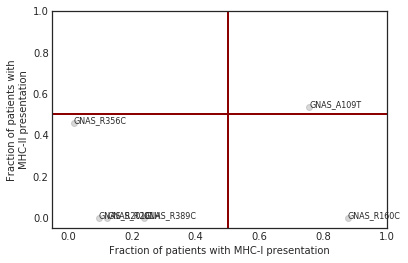

In [18]:
df = plot_patient_fractions(2, 10, patient_affinitiesI, patient_affinitiesII, mutations_to_plot)